Importing libraries

In [12]:
import pandas as pd

Importing dataset

In [2]:
dfratings=pd.read_csv(r"C:\Users\rithw\OneDrive\Desktop\Cognifyz internship\Dataset .csv")
print(dfratings.to_string())

      Restaurant ID                                         Restaurant Name  Country Code                    City                                                                                                                               Address                                             Locality                                                  Locality Verbose   Longitude   Latitude                                                                                       Cuisines  Average Cost for two                Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes
0           6317637                                        Le Petit Souffle           162             Makati City                                                               Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City            Century City Mall, Poblacion, Makati City            Century City Mall

Inspecting data

In [3]:
dfratings.info() #returns number of entries(rows),columns, datatypes of each columns, null value count etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Checking and handling missing values

In [4]:
dfratings.isnull().sum() #checks and returns number of null values in each column

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
dfratings['Cuisines']=dfratings['Cuisines'].fillna('Unknown') #from the above code, we found out that there are only null values in column 'Cuisines', so we are replacing it with 'Unknown'

In [6]:
dfratings.isnull().sum() #verifying

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Checking for duplicate rows

In [7]:
dfratings.duplicated().any() #checking whether there is any duplicated rows

False

1. Analyze the distribution of aggregate ratings and determine the most common rating range.

First, let us analyse the distribution of aggregate rating by visualising it creating a histogram using matplotlib and seaborn libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

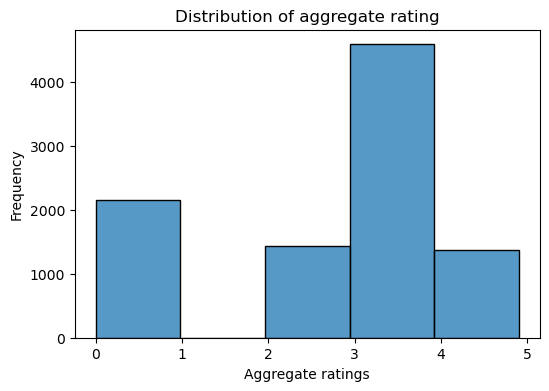

In [14]:
plt.figure(figsize=(6,4)) #creating a new figure with 6 inches width and 4 inches height
sns.histplot(dfratings['Aggregate rating'],bins=5) #creating histogram using column 'Aggregate rating' and 'bins=5' means we are dividing the range of aggregate ratings into 5 equal intervals
plt.title('Distribution of aggregate rating') #figure title
plt.xlabel('Aggregate ratings') #x-axis label
plt.ylabel('Frequency') #y-axis label
plt.show() #display figure

So as the above histogram shows, it can be understood that most common rating range is 3-4. Let us verify it using code 

In [15]:
rating_ranges=pd.cut(dfratings['Aggregate rating'], bins=[0,1,2,3,4,5]) #here, pd.cut() is used to divide the values in 'Aggregate rating' into groups called 'bins'. Bins we have set here are 0-1, 1-2, 2-3, 3-4, 4-5.
most_common_range=rating_ranges.value_counts().idxmax()#here, we are counting the number of occurance of bins (using value_counts()) and from that, obtaining the bin which has appeared the most (using idxmax())
print(most_common_range)

(3, 4]


Above result (3,4] indicated that most common rating range starts from grater than 3 (not including 3) to 4 (including 4) 

2. Average number of votes received by restaurants

In [10]:
average_votes=dfratings['Votes'].mean() #average number of votes received by all restaurants
print(average_votes)

156.909747670401


In [16]:
average_votes_in_each_range=dfratings.groupby(rating_ranges)['Votes'].mean() #finding out average votes received by restaurants in each rating range (0-1, 1-2, 2-3, 3-4, 4-5), by groupby() function 
print(average_votes_in_each_range)

Aggregate rating
(0, 1]           NaN
(1, 2]    144.200000
(2, 3]     38.991010
(3, 4]    162.152005
(4, 5]    637.413824
Name: Votes, dtype: float64
